In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pathlib import Path
import warnings

In [2]:
import pandas as pd

file = Path('Resources/Myopia.csv')  # define path to file

In [3]:
df = pd.read_csv(file)  # read into data frame

In [4]:
df.sample(2) # show first 10 of dataframe

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
50,5,0.265,21.980000,3.532,3.466,14.98,6,1,1,1,2,10,1,1,0
85,6,0.361,23.190001,3.452,3.406,16.33,8,4,2,0,6,22,1,1,0


In [5]:
# clean dataframe and drop uncessary column2
df = df.drop(columns=["MYOPIC"])
df.head(2)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1


In [6]:
# Normalize the data
normalized = normalize(df)

In [7]:
normalized[:3]

array([[ 0.09365725, -0.0008117 ,  0.34169285,  0.05759921,  0.05460217,
         0.22946025,  0.70242936,  0.12487633,  0.        ,  0.        ,
         0.15609541,  0.5307244 ,  0.01560954,  0.01560954],
       [ 0.18886717,  0.01913854,  0.70447453,  0.11653104,  0.10677291,
         0.48129651,  0.12591145,  0.        ,  0.03147786,  0.03147786,
         0.22034503,  0.37773434,  0.03147786,  0.03147786],
       [ 0.16612953,  0.03264445,  0.62270883,  0.09585673,  0.09729652,
         0.42972172,  0.38763556,  0.        ,  0.05537651,  0.        ,
         0.27688254,  0.38763556,  0.        ,  0.        ]])

In [8]:
# Create a new dataframe with the normalized data
df2 = pd.DataFrame(normalized)

In [9]:
df2.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.093657,-0.000812,0.341693,0.057599,0.054602,0.229460,0.702429,0.124876,0.000000,0.000000,0.156095,0.530724,0.015610,0.015610
1,0.188867,0.019139,0.704475,0.116531,0.106773,0.481297,0.125911,0.000000,0.031478,0.031478,0.220345,0.377734,0.031478,0.031478


In [10]:
# Copy column names over to new data frame
df2.columns = df.columns

In [11]:
df2.head(2)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,0.093657,-0.000812,0.341693,0.057599,0.054602,0.229460,0.702429,0.124876,0.000000,0.000000,0.156095,0.530724,0.015610,0.015610
1,0.188867,0.019139,0.704475,0.116531,0.106773,0.481297,0.125911,0.000000,0.031478,0.031478,0.220345,0.377734,0.031478,0.031478


Part 2: Apply Dimensionality Reduction

Perform dimensionality reduction with PCA. How did the number of the features change?



Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.



Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.


Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [12]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA()
tsne = TSNE(init=pca)

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2)

In [14]:
pca = PCA(n_components=0.95)
pca_transformed_data = pca.fit_transform(scaled_data)

In [15]:
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)

C:\Users\vertt\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [16]:
df2["x"] = transformed_features[:,0]
df2["y"] = transformed_features[:,1]
df2["class"] = df["AGE"]

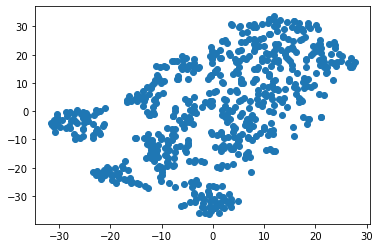

In [17]:
#create scatter plot
plt.scatter(df2["x"], df2["y"])
plt.show()

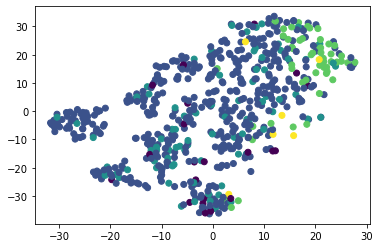

In [18]:
#create multi  scatter plot
plt.scatter(df2["x"], df2["y"], c=df2["class"])
plt.show()

Part 3: Perform a Cluster Analysis with K-means
Create an elbow plot to identify the best number of clusters.

In [19]:
from sklearn.cluster import KMeans

In [20]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\vertt\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,234007.104068
1,2,126211.687610
2,3,93108.597058
3,4,78236.040289
4,5,67245.959484


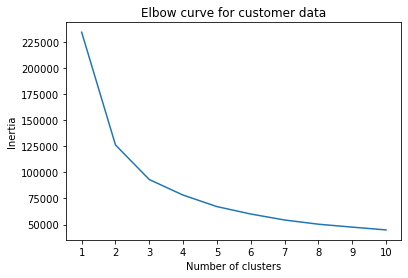

In [21]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

The elbow at the plot is at k 3

Based on the above information the patients can be clustered possibly in 3 